## Observations and Insights 

In [96]:
%matplotlib inline

In [172]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_research_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
mouse_research_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [173]:
# Checking the number of mice.
unique_id = mouse_research_df["Mouse ID"].unique()
unique_id
count_of_mice = len(unique_id)
count_of_mice


249

In [174]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# get total lenth
count_of_mice = len(mouse_research_df['Mouse ID'])
print(count_of_mice)

# find duplicate mouse data
duplicate_rows = mouse_research_df[mouse_research_df.duplicated()]
duplicate_rows
#remove_mouse_id = duplicate_rows['Mouse ID']
remove_mouse_id = duplicate_rows.to_dict('list')
remove_mouse_id = remove_mouse_id.get('Mouse ID')
remove_mouse_id = remove_mouse_id[0]
print(remove_mouse_id)

1893
g989


In [75]:
# Optional: Get all the data for the duplicate mouse ID. 
# Check duplicate data to verify it woked as expected.
duplicate_data = mouse_research_df.loc[mouse_research_df['Mouse ID'] == remove_mouse_id]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [175]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_research_clean = mouse_research_df.drop(mouse_research_df[mouse_research_df['Mouse ID'] == remove_mouse_id].index, inplace = True)
print(mouse_research_clean)


None


In [176]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_research_df['Mouse ID']))

1880


## Summary Statistics

In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = mouse_research_df.groupby

# Assemble the resulting series into a single summary dataframe.



In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

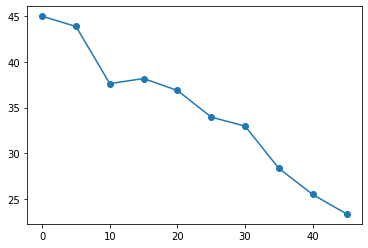

In [190]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_research_df.loc[(mouse_research_df['Drug Regimen'] == 'Capomulin') & (mouse_research_df['Mouse ID'] == 's185'), :]
#print(capomulin)

x_value_line = capomulin['Timepoint']
y_value_line = capomulin['Tumor Volume (mm3)']
plt.plot(x_value_line, y_value_line, marker='o')
plt.show()


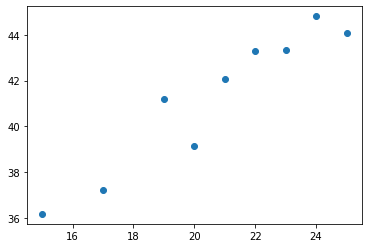

In [192]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = mouse_research_df.loc[mouse_research_df['Drug Regimen'] == 'Capomulin']
capomulin_tumor_volume = capomulin.groupby('Weight (g)')
#capomulin_tumor_volume.mean()
#print(capomulin)
av_tumor_volume = pd.DataFrame(capomulin_tumor_volume.mean()['Tumor Volume (mm3)']).reset_index()
#av_tumor_volume
x_value_scatter = av_tumor_volume['Weight (g)']
#print(x_axis_scatter)
y_value_scatter = av_tumor_volume['Tumor Volume (mm3)']
plt.scatter(x_value_scatter, y_value_scatter)
plt.show()



## Correlation and Regression

The correlation coefficient is: 0.950524396185527 and the r-squared value is: 0.9034966277438606


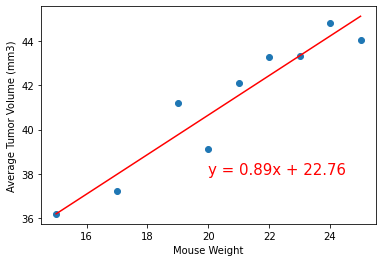

In [193]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_scatter, y_value_scatter)
regress_values = x_value_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_scatter,y_value_scatter)
plt.plot(x_value_scatter,regress_values,"r-")
plt.annotate(line_eq, (20,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()
